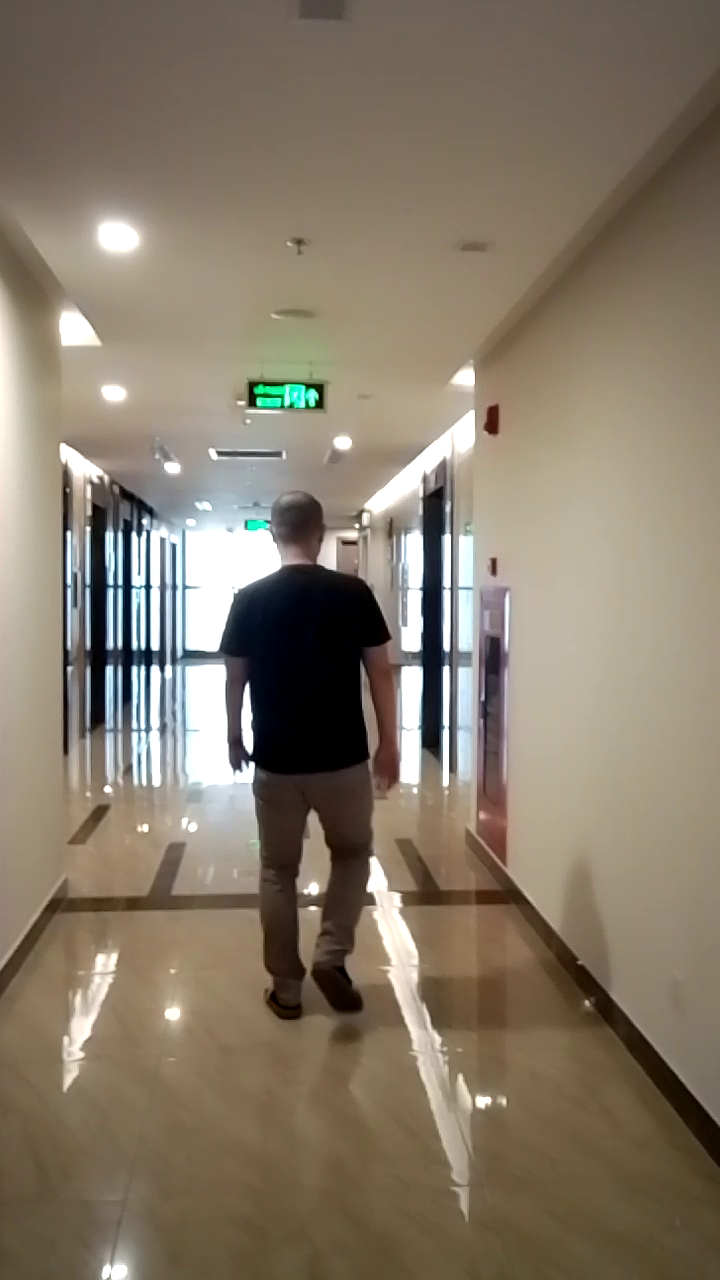

In [120]:
### Load Video and Display first Frame
from torchvision.io import read_video
import random
from torchvision.transforms.functional import to_pil_image

video, audio, meta = read_video("walking.mp4", pts_unit="sec", output_format="TCHW")
fps = meta['video_fps']
frame_count = len(video)
index = random.randrange(frame_count)
sample = to_pil_image(video[index]).rotate(90, expand=True)
sample


In [121]:
### Load Human Segmentation Model
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_V2_Weights, maskrcnn_resnet50_fpn_v2

weights = MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1
model = maskrcnn_resnet50_fpn_v2(weights=weights)
transforms = weights.transforms()

model.eval().to("cpu")

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [122]:
### Transform Input Image for Inference
input_image = transforms(sample)
input_image

tensor([[[0.3529, 0.3529, 0.3529,  ..., 0.3569, 0.3569, 0.3569],
         [0.3529, 0.3529, 0.3529,  ..., 0.3569, 0.3569, 0.3569],
         [0.3529, 0.3529, 0.3529,  ..., 0.3569, 0.3569, 0.3569],
         ...,
         [0.3373, 0.3333, 0.3490,  ..., 0.3176, 0.3216, 0.3216],
         [0.3333, 0.3333, 0.3490,  ..., 0.3176, 0.3216, 0.3216],
         [0.3333, 0.3333, 0.3490,  ..., 0.3176, 0.3216, 0.3216]],

        [[0.3137, 0.3137, 0.3137,  ..., 0.3216, 0.3216, 0.3216],
         [0.3137, 0.3137, 0.3137,  ..., 0.3216, 0.3216, 0.3216],
         [0.3137, 0.3137, 0.3137,  ..., 0.3216, 0.3216, 0.3216],
         ...,
         [0.2863, 0.2824, 0.2980,  ..., 0.2784, 0.2824, 0.2824],
         [0.2824, 0.2824, 0.2980,  ..., 0.2784, 0.2824, 0.2824],
         [0.2824, 0.2824, 0.2980,  ..., 0.2784, 0.2824, 0.2824]],

        [[0.2745, 0.2745, 0.2745,  ..., 0.2980, 0.2980, 0.2980],
         [0.2745, 0.2745, 0.2745,  ..., 0.2980, 0.2980, 0.2980],
         [0.2745, 0.2745, 0.2745,  ..., 0.2980, 0.2980, 0.

In [123]:
### Run Segmentation Inference on sample frame
predictions = model([input_image.to("cpu")])
predictions

[{'boxes': tensor([[ 217.8367,  482.2813,  401.3089, 1019.6553],
          [ 477.5670,  586.2567,  510.6350,  830.8935],
          [ 244.4221,  380.2228,  327.2842,  411.9987],
          [ 284.9394,  236.4340,  312.8083,  255.8141],
          [ 472.1717,  578.2438,  508.8922,  863.3285],
          [ 421.7430,  458.1512,  450.5583,  776.6435],
          [ 249.1594,  382.7950,  320.4955,  409.3080],
          [ 421.1843,  411.4371,  470.6403,  802.3127],
          [ 372.0663,  773.4204,  389.2776,  799.0027],
          [ 245.3988,  380.5958,  326.9092,  410.5897],
          [ 398.9582,  532.1861,  424.6121,  755.4712]],
         grad_fn=<StackBackward0>),
  'labels': tensor([ 1, 82, 72, 16, 79, 82, 10, 82, 47, 85, 82]),
  'scores': tensor([0.9998, 0.6799, 0.5822, 0.3737, 0.3244, 0.2347, 0.1340, 0.1041, 0.0803,
          0.0783, 0.0661], grad_fn=<IndexBackward0>),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ...

In [124]:
### Select Masks and Scores from Predictions
masks = predictions[0]['masks']
scores = predictions[0]['scores']
scores

tensor([0.9998, 0.6799, 0.5822, 0.3737, 0.3244, 0.2347, 0.1340, 0.1041, 0.0803,
        0.0783, 0.0661], grad_fn=<IndexBackward0>)

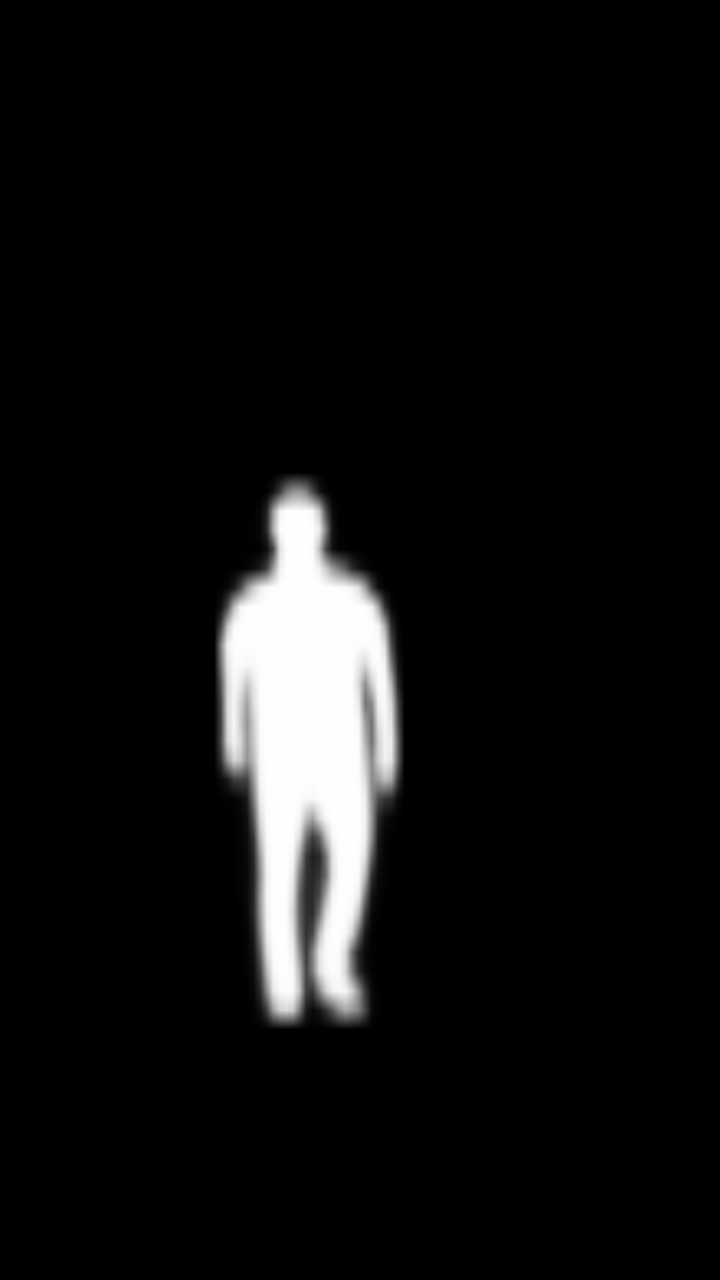

In [125]:
### Filtering for the Main Target
import torch
top = torch.max(scores)
idx = torch.where(scores==top)

mask = torch.squeeze(masks[idx][0], dim=1)
to_pil_image(mask)

In [127]:
### Find the Minimum Pixel Threshold for Mask
import torch

histogram = torch.histogram(mask, 100)
dists = histogram.hist
bins = histogram.bin_edges

min_value = torch.min(dists)
idx = torch.where(dists == min_value)
threshold = bins[idx]

bool_mask = mask > threshold
bool_mask

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

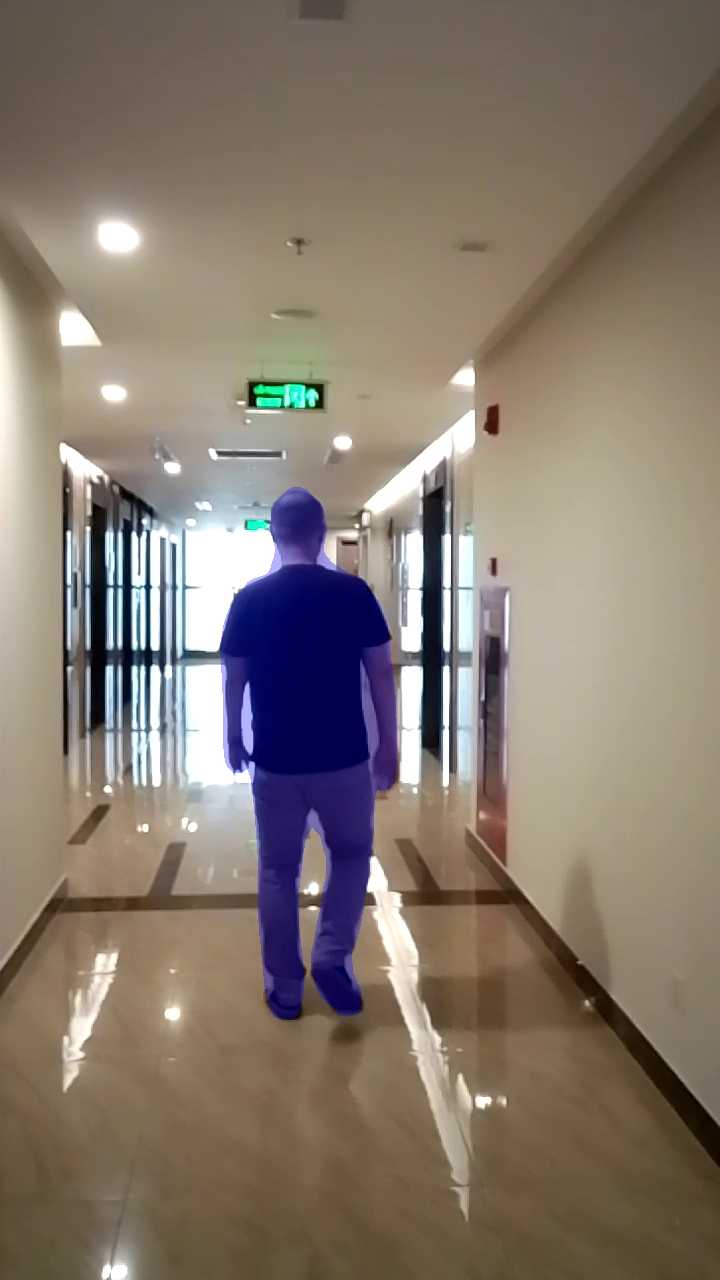

In [129]:
### Drawing Segmantion Mask 
from torchvision.utils import draw_segmentation_masks
from torchvision.transforms.functional import pil_to_tensor

tensor_image = pil_to_tensor(sample)
masked_image = draw_segmentation_masks(tensor_image, bool_mask, alpha=0.3, colors=["blue"])
to_pil_image(masked_image)
